### Keras Tutorial

This tutorial is the next tutorial after **TensorFlow** tutorial, here I just want to make another tutorial for most popular deep learning framework: **Keras**! In fact, for using keras is really easy to build deep learning models, I will show you step by step with **Keras** to make deep learning models.

Before you step up, you should install keras with pip: `pip install keras`! But one thing to notice, keras itself is not an directly framework, it's build upon with some other deep learning framework like: `TensorFlow`, `theano`, etc. As for now, keras is high level framework for **TensorFlow**, I really recommend you should install **TensorFlow**! If without GPU, then you could just install it with pip: `pip install tensorflow`, but if you have GPU, then you could install it with `pip install tensorflow-gpu`, but you should install the driver from CuDNN etc.

In [1]:
import keras
# as you could see that for my computer, I just use tensorflow backand.

Using TensorFlow backend.


### Sequencial

Most basic use case to build model is to use `Sequence` module, as when you just want your model with linked layers, the `Sequence` module really should be used. Here I just show you with model to fit for digits datasets for example.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

x, y = load_digits(return_X_y=True)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

In [14]:
# as we have get the training and testing data, then we could build our model
# first we should import sequencial module
from keras.models import Sequential

# then we could first build our init model 
model = Sequential()

In [15]:
# then we could get some info with current model, we could just use summay() function!
# we could see that there is nothing in the model for now.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [16]:
# we could add some layers to current model
# keras is really objective, layers are object, you could easily add layer to sequencial objct
from keras.layers import Dense

# here is just one hidden layer with 128 units, we should add the keras input_dim for the input data shape
# then keras could inference the whole models' parameters
model.add(Dense(128, activation='relu',  input_dim=(x.shape[1])))
model.add(Dense(10, activation='softmax'))

In [17]:
# see model's structure and parameters
# as you could see that we just with 9610 units for whole model.
# for large model, there will be far more than current model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# then we should compile our model, to define the loss function, optimizer, evaluation object
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.adam())

In [19]:
# then we could start our training step with model fit
his = model.fit(xtrain, ytrain, epochs=100, batch_size=512, validation_data=(xtest, ytest), verbose=1)

Train on 1437 samples, validate on 360 samples
Epoch 1/100
1437/1437 [==============================] - 0s 135us/step - loss: 7.7370 - acc: 0.0668 - val_loss: 6.2559 - val_acc: 0.0639
Epoch 2/100
1437/1437 [==============================] - 0s 12us/step - loss: 5.6408 - acc: 0.0905 - val_loss: 4.8711 - val_acc: 0.0972
Epoch 3/100
1437/1437 [==============================] - 0s 12us/step - loss: 4.3199 - acc: 0.1461 - val_loss: 3.7113 - val_acc: 0.2083
Epoch 4/100
1437/1437 [==============================] - 0s 15us/step - loss: 3.2347 - acc: 0.2784 - val_loss: 2.8987 - val_acc: 0.3278
Epoch 5/100
1437/1437 [==============================] - 0s 14us/step - loss: 2.4760 - acc: 0.4050 - val_loss: 2.2298 - val_acc: 0.4278
Epoch 6/100
1437/1437 [==============================] - 0s 13us/step - loss: 1.8908 - acc: 0.5003 - val_loss: 1.6584 - val_acc: 0.5361
Epoch 7/100
1437/1437 [==============================] - 0s 14us/step - loss: 1.4329 - acc: 0.5887 - val_loss: 1.2969 - val_acc: 0.6139


1437/1437 [==============================] - 0s 10us/step - loss: 0.0368 - acc: 0.9972 - val_loss: 0.1161 - val_acc: 0.9667
Epoch 61/100
1437/1437 [==============================] - 0s 10us/step - loss: 0.0356 - acc: 0.9972 - val_loss: 0.1147 - val_acc: 0.9667
Epoch 62/100
1437/1437 [==============================] - 0s 10us/step - loss: 0.0347 - acc: 0.9972 - val_loss: 0.1139 - val_acc: 0.9667
Epoch 63/100
1437/1437 [==============================] - 0s 10us/step - loss: 0.0339 - acc: 0.9972 - val_loss: 0.1135 - val_acc: 0.9667
Epoch 64/100
1437/1437 [==============================] - 0s 10us/step - loss: 0.0329 - acc: 0.9972 - val_loss: 0.1125 - val_acc: 0.9667
Epoch 65/100
1437/1437 [==============================] - 0s 10us/step - loss: 0.0319 - acc: 0.9979 - val_loss: 0.1115 - val_acc: 0.9667
Epoch 66/100
1437/1437 [==============================] - 0s 9us/step - loss: 0.0312 - acc: 0.9979 - val_loss: 0.1110 - val_acc: 0.9667
Epoch 67/100
1437/1437 [==============================]

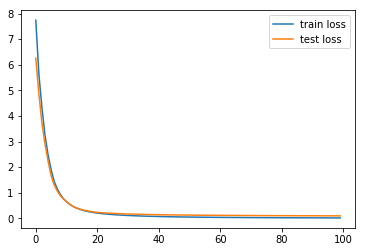

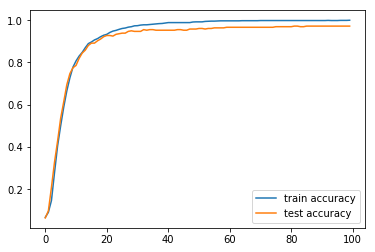

In [24]:
# we could plot our training loss and test loss
import matplotlib.pyplot as plt

plt.plot(his.history['loss'], label='train loss')
plt.plot(his.history['val_loss'], label='test loss')

plt.legend()

plt.show()
# -------------accuracy
plt.plot(his.history['acc'], label='train accuracy')
plt.plot(his.history['val_acc'], label='test accuracy')

plt.legend()

plt.show()